## Exercise 2.3 Complex Machine Learning Models and Keras Part 2

### 1. Importing Libraries and Data
### 2. Data Preprocessing
### 3. Model Building
### 4. Model Evaluation
### 5. Building random forest model for each station
### 6. Conclusion

### 1. Importing Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn import datasets  
from sklearn.ensemble import RandomForestClassifier
from numpy import argmax
from sklearn import metrics  
from sklearn.tree import plot_tree
from sklearn import tree
from sklearn.model_selection import train_test_split

2024-07-17 20:37:44.431509: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
path = '/Users/mariazaremba/Documents/CareerFoundry/Machine Learning with Python'

In [3]:
climate_cleaned = pd.read_csv(os.path.join(path, 'Data', 'Original Data', 'climate_cleaned.csv'), index_col = False)

In [4]:
climate_cleaned.head()

Unnamed: 0  BASEL_cloud_cover  BASEL_humidity  BASEL_pressure  \
0           0                  7            0.85           1.018   
1           1                  6            0.84           1.018   
2           2                  8            0.90           1.018   
3           3                  3            0.92           1.018   
4           4                  6            0.95           1.018   

   BASEL_global_radiation  BASEL_precipitation  BASEL_sunshine  \
0                    0.32                 0.09             0.7   
1                    0.36                 1.05             1.1   
2                    0.18                 0.30             0.0   
3                    0.58                 0.00             4.1   
4                    0.65                 0.14             5.4   

   BASEL_temp_mean  BASEL_temp_min  BASEL_temp_max  ...  STOCKHOLM_temp_max  \
0              6.5             0.8            10.9  ...                 4.9   
1              6.1             3.3            10.1  ...                 5.0   
2              8.5             5.1             9.9  ...                 4.1   
3              6.3             3.8            10.6  ...                 2.3   
4              3.0            -0.7             6.0  ...                 4.3   

   VALENTIA_cloud_cover  VALENTIA_humidity  VALENTIA_pressure  \
0                     5               0.88             1.0003   
1                     7               0.91             1.0007   
2                     7               0.91             1.0096   
3                     7               0.86             1.0184   
4                     3               0.80             1.0328   

   VALENTIA_global_radiation  VALENTIA_precipitation  VALENTIA_sunshine  \
0                       0.45                    0.34                4.7   
1                       0.25                    0.84                0.7   
2                       0.17                    0.08                0.1   
3                       0.13                    0.98                0.0   
4                       0.46                    0.00                5.7   

   VALENTIA_temp_mean  VALENTIA_temp_min  VALENTIA_temp_max  
0                 8.5                6.0               10.9  
1                 8.9                5.6               12.1  
2                10.5                8.1               12.9  
3                 7.4                7.3               10.6  
4                 5.7                3.0                8.4  

[5 rows x 136 columns]

In [5]:
climate_cleaned = climate_cleaned.drop('Unnamed: 0', axis=1)

In [6]:
climate_cleaned.head()

BASEL_cloud_cover  BASEL_humidity  BASEL_pressure  BASEL_global_radiation  \
0                  7            0.85           1.018                    0.32   
1                  6            0.84           1.018                    0.36   
2                  8            0.90           1.018                    0.18   
3                  3            0.92           1.018                    0.58   
4                  6            0.95           1.018                    0.65   

   BASEL_precipitation  BASEL_sunshine  BASEL_temp_mean  BASEL_temp_min  \
0                 0.09             0.7              6.5             0.8   
1                 1.05             1.1              6.1             3.3   
2                 0.30             0.0              8.5             5.1   
3                 0.00             4.1              6.3             3.8   
4                 0.14             5.4              3.0            -0.7   

   BASEL_temp_max  BELGRADE_cloud_cover  ...  STOCKHOLM_temp_max  \
0            10.9                     1  ...                 4.9   
1            10.1                     6  ...                 5.0   
2             9.9                     6  ...                 4.1   
3            10.6                     8  ...                 2.3   
4             6.0                     8  ...                 4.3   

   VALENTIA_cloud_cover  VALENTIA_humidity  VALENTIA_pressure  \
0                     5               0.88             1.0003   
1                     7               0.91             1.0007   
2                     7               0.91             1.0096   
3                     7               0.86             1.0184   
4                     3               0.80             1.0328   

   VALENTIA_global_radiation  VALENTIA_precipitation  VALENTIA_sunshine  \
0                       0.45                    0.34                4.7   
1                       0.25                    0.84                0.7   
2                       0.17                    0.08                0.1   
3                       0.13                    0.98                0.0   
4                       0.46                    0.00                5.7   

   VALENTIA_temp_mean  VALENTIA_temp_min  VALENTIA_temp_max  
0                 8.5                6.0               10.9  
1                 8.9                5.6               12.1  
2                10.5                8.1               12.9  
3                 7.4                7.3               10.6  
4                 5.7                3.0                8.4  

[5 rows x 135 columns]

In [7]:
climate_cleaned.shape

(22950, 135)

In [8]:
climate = pd.read_csv(os.path.join(path, 'Data', 'Original Data', 'Dataset-weather-prediction-dataset-processed.csv'), index_col = False)

In [9]:
#Read in the pleasant weather data.
pleasantweather = pd.read_csv(os.path.join(path, 'Data', 'Original Data', 'Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv'))

In [10]:
pleasantweather.head()

DATE  BASEL_pleasant_weather  BELGRADE_pleasant_weather  \
0  19600101                       0                          0   
1  19600102                       0                          0   
2  19600103                       0                          0   
3  19600104                       0                          0   
4  19600105                       0                          0   

   BUDAPEST_pleasant_weather  DEBILT_pleasant_weather  \
0                          0                        0   
1                          0                        0   
2                          0                        0   
3                          0                        0   
4                          0                        0   

   DUSSELDORF_pleasant_weather  HEATHROW_pleasant_weather  \
0                            0                          0   
1                            0                          0   
2                            0                          0   
3                            0                          0   
4                            0                          0   

   KASSEL_pleasant_weather  LJUBLJANA_pleasant_weather  \
0                        0                           0   
1                        0                           0   
2                        0                           0   
3                        0                           0   
4                        0                           0   

   MAASTRICHT_pleasant_weather  MADRID_pleasant_weather  \
0                            0                        0   
1                            0                        0   
2                            0                        0   
3                            0                        0   
4                            0                        0   

   MUNCHENB_pleasant_weather  OSLO_pleasant_weather  \
0                          0                      0   
1                          0                      0   
2                          0                      0   
3                          0                      0   
4                          0                      0   

   SONNBLICK_pleasant_weather  STOCKHOLM_pleasant_weather  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   

   VALENTIA_pleasant_weather  
0                          0  
1                          0  
2                          0  
3                          0  
4                          0

In [11]:
pleasantweather.shape

(22950, 16)

### 2. Data Preprocessing

In [12]:
climate_cleaned['DATE'] = climate['DATE']

In [13]:
climate_cleaned.head()

BASEL_cloud_cover  BASEL_humidity  BASEL_pressure  BASEL_global_radiation  \
0                  7            0.85           1.018                    0.32   
1                  6            0.84           1.018                    0.36   
2                  8            0.90           1.018                    0.18   
3                  3            0.92           1.018                    0.58   
4                  6            0.95           1.018                    0.65   

   BASEL_precipitation  BASEL_sunshine  BASEL_temp_mean  BASEL_temp_min  \
0                 0.09             0.7              6.5             0.8   
1                 1.05             1.1              6.1             3.3   
2                 0.30             0.0              8.5             5.1   
3                 0.00             4.1              6.3             3.8   
4                 0.14             5.4              3.0            -0.7   

   BASEL_temp_max  BELGRADE_cloud_cover  ...  VALENTIA_cloud_cover  \
0            10.9                     1  ...                     5   
1            10.1                     6  ...                     7   
2             9.9                     6  ...                     7   
3            10.6                     8  ...                     7   
4             6.0                     8  ...                     3   

   VALENTIA_humidity  VALENTIA_pressure  VALENTIA_global_radiation  \
0               0.88             1.0003                       0.45   
1               0.91             1.0007                       0.25   
2               0.91             1.0096                       0.17   
3               0.86             1.0184                       0.13   
4               0.80             1.0328                       0.46   

   VALENTIA_precipitation  VALENTIA_sunshine  VALENTIA_temp_mean  \
0                    0.34                4.7                 8.5   
1                    0.84                0.7                 8.9   
2                    0.08                0.1                10.5   
3                    0.98                0.0                 7.4   
4                    0.00                5.7                 5.7   

   VALENTIA_temp_min  VALENTIA_temp_max      DATE  
0                6.0               10.9  19600101  
1                5.6               12.1  19600102  
2                8.1               12.9  19600103  
3                7.3               10.6  19600104  
4                3.0                8.4  19600105  

[5 rows x 136 columns]

In [14]:
climate_cleaned.to_csv(os.path.join(path, 'Data', 'Prepared Data','climate_cleaned_DATE.csv'))

In [15]:
#Reduce your dataset to only one decade
climate_filtered = climate_cleaned.loc[climate['DATE'].astype(str).str[:4].isin(['2020','2019','2018','2017','2016','2015','2014','2013','2012','2011'])] #<-----INSERT YEAR HERE

In [16]:
climate_filtered.head()

BASEL_cloud_cover  BASEL_humidity  BASEL_pressure  \
18628                  8            0.97          1.0232   
18629                  8            0.94          1.0234   
18630                  4            0.93          1.0254   
18631                  6            0.89          1.0208   
18632                  5            0.79          1.0142   

       BASEL_global_radiation  BASEL_precipitation  BASEL_sunshine  \
18628                    0.13                 0.00             0.0   
18629                    0.13                 0.00             0.0   
18630                    0.64                 0.00             6.1   
18631                    0.38                 0.00             1.0   
18632                    0.64                 0.06             6.5   

       BASEL_temp_mean  BASEL_temp_min  BASEL_temp_max  BELGRADE_cloud_cover  \
18628             -0.2            -0.8             0.3                     4   
18629             -0.2            -3.9             1.4                     8   
18630             -3.3            -5.2            -0.9                     7   
18631             -3.6            -5.8            -1.9                     4   
18632             -0.8            -5.4             2.5                     1   

       ...  VALENTIA_cloud_cover  VALENTIA_humidity  VALENTIA_pressure  \
18628  ...                     5               0.82             1.0142   
18629  ...                     5               0.82             1.0142   
18630  ...                     5               0.82             1.0142   
18631  ...                     5               0.82             1.0142   
18632  ...                     5               0.82             1.0142   

       VALENTIA_global_radiation  VALENTIA_precipitation  VALENTIA_sunshine  \
18628                       0.13                    0.41                3.4   
18629                       0.15                    0.41                3.4   
18630                       0.17                    0.41                3.4   
18631                       0.22                    0.41                3.4   
18632                       0.23                    0.41                3.4   

       VALENTIA_temp_mean  VALENTIA_temp_min  VALENTIA_temp_max      DATE  
18628                10.7                7.9                6.6  20110101  
18629                10.7                7.9                5.4  20110102  
18630                10.7                7.9                4.5  20110103  
18631                10.7                7.9                7.9  20110104  
18632                10.7                7.9                7.8  20110105  

[5 rows x 136 columns]

In [17]:
climate_filtered.shape

(3653, 136)

In [18]:
#Reduce your dataset to only one decade
pleasantweather_filtered = pleasantweather.loc[climate['DATE'].astype(str).str[:4].isin(['2020','2019','2018','2017','2016','2015','2014','2013','2012','2011'])] #<-----INSERT YEAR HERE

In [19]:
pleasantweather_filtered.head()

DATE  BASEL_pleasant_weather  BELGRADE_pleasant_weather  \
18628  20110101                       0                          0   
18629  20110102                       0                          0   
18630  20110103                       0                          0   
18631  20110104                       0                          0   
18632  20110105                       0                          0   

       BUDAPEST_pleasant_weather  DEBILT_pleasant_weather  \
18628                          0                        0   
18629                          0                        0   
18630                          0                        0   
18631                          0                        0   
18632                          0                        0   

       DUSSELDORF_pleasant_weather  HEATHROW_pleasant_weather  \
18628                            0                          0   
18629                            0                          0   
18630                            0                          0   
18631                            0                          0   
18632                            0                          0   

       KASSEL_pleasant_weather  LJUBLJANA_pleasant_weather  \
18628                        0                           0   
18629                        0                           0   
18630                        0                           0   
18631                        0                           0   
18632                        0                           0   

       MAASTRICHT_pleasant_weather  MADRID_pleasant_weather  \
18628                            0                        0   
18629                            0                        0   
18630                            0                        0   
18631                            0                        0   
18632                            0                        0   

       MUNCHENB_pleasant_weather  OSLO_pleasant_weather  \
18628                          0                      0   
18629                          0                      0   
18630                          0                      0   
18631                          0                      0   
18632                          0                      0   

       SONNBLICK_pleasant_weather  STOCKHOLM_pleasant_weather  \
18628                           0                           0   
18629                           0                           0   
18630                           0                           0   
18631                           0                           0   
18632                           0                           0   

       VALENTIA_pleasant_weather  
18628                          0  
18629                          0  
18630                          0  
18631                          0  
18632                          0

In [20]:
pleasantweather_filtered.shape

(3653, 16)

In [21]:
climate_filtered = climate_filtered.drop('DATE', axis=1)

In [22]:
pleasantweather_filtered = pleasantweather_filtered.drop('DATE', axis=1)

In [23]:
climate_filtered.shape

(3653, 135)

In [24]:
pleasantweather_filtered.shape

(3653, 15)

### 3. Model Building

In [25]:
X = climate_filtered
y = pleasantweather_filtered

In [26]:
print(X.shape)
print(y.shape)

(3653, 135)
(3653, 15)


In [27]:
#Split data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [28]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(2922, 135) (2922, 15)
(731, 135) (731, 15)


In [29]:
# creating a RF classifier
clf = RandomForestClassifier(n_estimators = 100) #, max_depth=20)  
  
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(X_train, y_train)

RandomForestClassifier()

### 4. Model Evaluation

In [30]:
# performing predictions on the test dataset
y_pred = clf.predict(X_test)
  
# using metrics module for accuracy calculation
print("Model Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Model Accuracy:  0.6415868673050615


In [31]:
prediction = ['BAD WEATHER',
       'GOOD WEATHER'
      ]

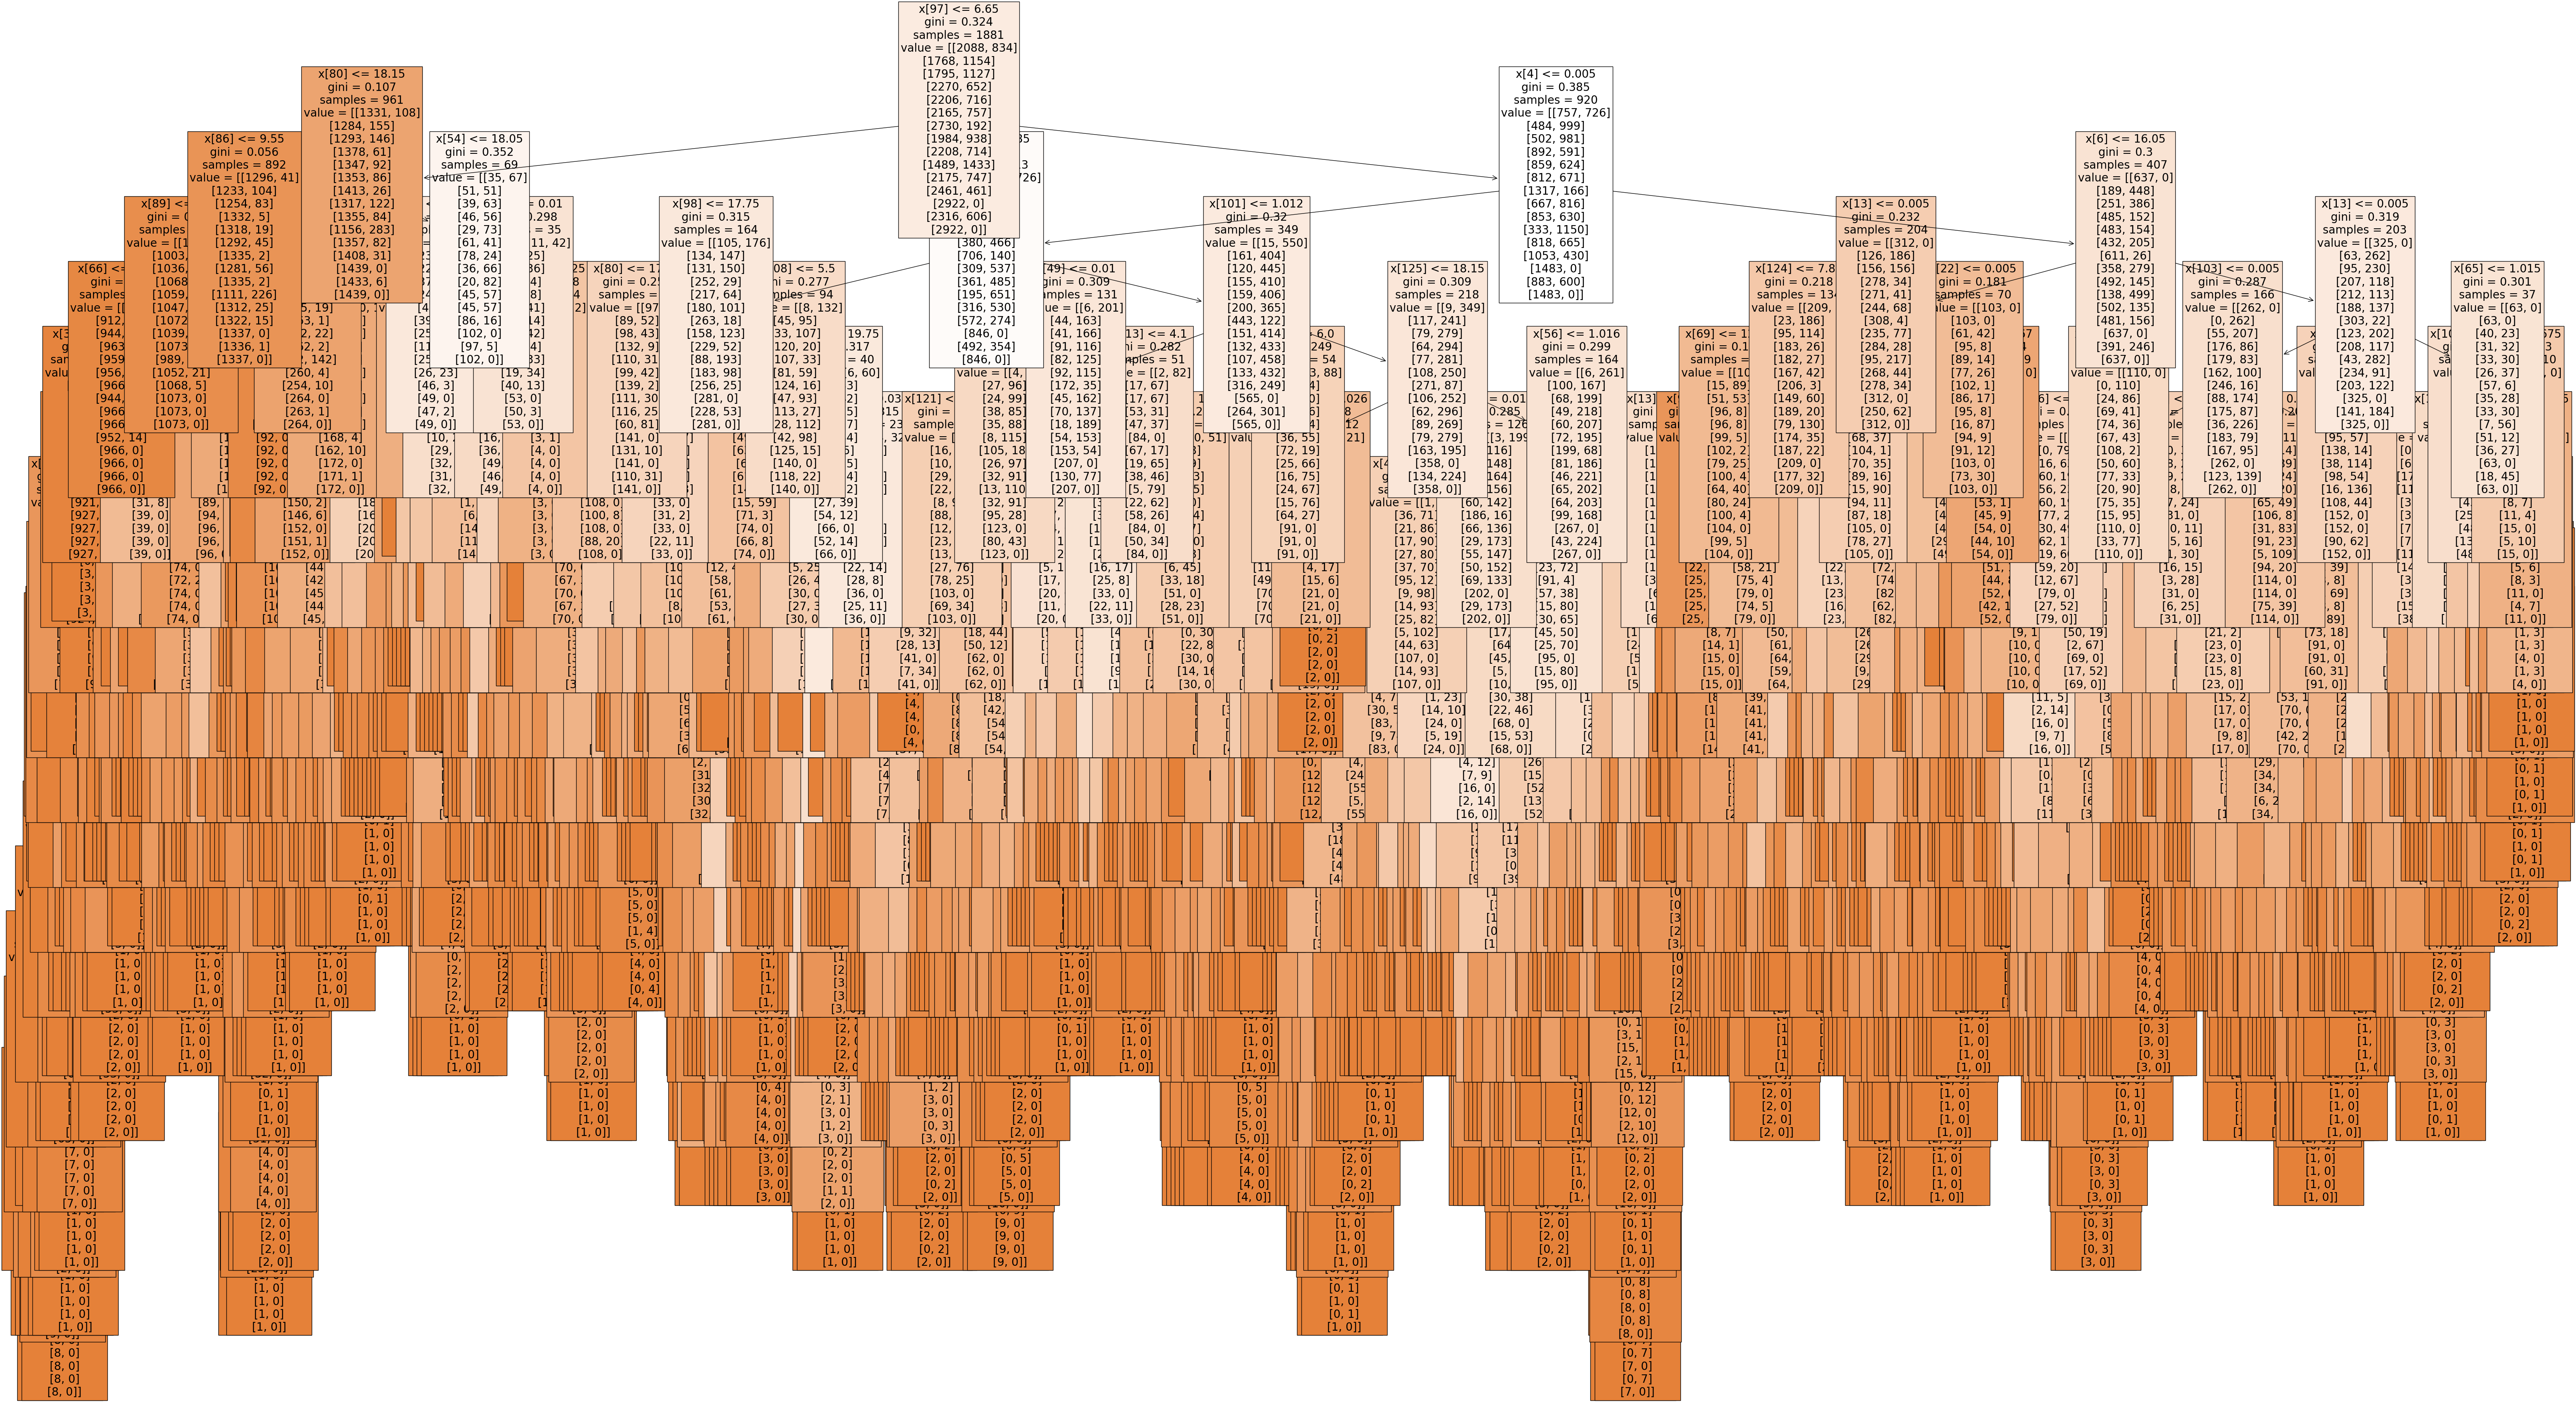

In [32]:
fig = plt.figure(figsize=(80,40))
plot_tree(clf.estimators_[99], fontsize = 20, class_names=prediction, filled=True);

In [33]:
np.set_printoptions(threshold=np.inf)
newarray = clf.feature_importances_
#print(clf.feature_importances_.shape)
newarray

array([3.14915771e-03, 3.77011274e-03, 3.28787354e-03, 3.63159388e-03,
       1.98462582e-02, 9.04001879e-03, 2.08570796e-02, 4.13573778e-03,
       4.64179019e-02, 4.08359034e-03, 3.39304396e-03, 3.84629318e-03,
       2.91987501e-03, 1.60910495e-02, 3.19727090e-03, 1.01251764e-02,
       3.59623268e-03, 7.90728041e-03, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 9.64854231e-04, 1.40793770e-02, 9.69452711e-04,
       1.95140393e-02, 1.12526967e-02, 1.74047064e-02, 2.37353381e-03,
       3.17051875e-03, 5.52380326e-03, 4.22904913e-03, 1.55811830e-02,
       6.62062112e-03, 7.15134730e-03, 2.99018177e-03, 3.98715803e-02,
       3.54346576e-03, 3.14476120e-03, 5.10831729e-03, 3.77921911e-03,
       1.74204901e-02, 6.04322591e-03, 2.01887830e-02, 2.78285084e-03,
       2.56355231e-02, 2.81404942e-03, 4.20456542e-03, 3.93345445e-03,
       4.29805549e-03, 1.15041100e-02, 3.87074060e-03, 2.17888320e-02,
       2.91644884e-03, 3.69689167e-03, 1.69960150e-02, 2.28172497e-03,
      

In [34]:
np.set_printoptions(threshold=1000)

In [35]:
newarray = newarray.reshape(-1,15,9)
print(newarray.shape)
newarray

(1, 15, 9)


array([[[3.14915771e-03, 3.77011274e-03, 3.28787354e-03, 3.63159388e-03,
         1.98462582e-02, 9.04001879e-03, 2.08570796e-02, 4.13573778e-03,
         4.64179019e-02],
        [4.08359034e-03, 3.39304396e-03, 3.84629318e-03, 2.91987501e-03,
         1.60910495e-02, 3.19727090e-03, 1.01251764e-02, 3.59623268e-03,
         7.90728041e-03],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 9.64854231e-04,
         1.40793770e-02, 9.69452711e-04, 1.95140393e-02, 1.12526967e-02,
         1.74047064e-02],
        [2.37353381e-03, 3.17051875e-03, 5.52380326e-03, 4.22904913e-03,
         1.55811830e-02, 6.62062112e-03, 7.15134730e-03, 2.99018177e-03,
         3.98715803e-02],
        [3.54346576e-03, 3.14476120e-03, 5.10831729e-03, 3.77921911e-03,
         1.74204901e-02, 6.04322591e-03, 2.01887830e-02, 2.78285084e-03,
         2.56355231e-02],
        [2.81404942e-03, 4.20456542e-03, 3.93345445e-03, 4.29805549e-03,
         1.15041100e-02, 3.87074060e-03, 2.17888320e-02, 2.91644884

In [36]:
sumarray = np.sum(newarray[0], axis=1)
sumarray

array([0.11413573, 0.05515981, 0.06418513, 0.08751182, 0.08764664,
       0.05902715, 0.03771034, 0.08024044, 0.10019842, 0.06271525,
       0.10389138, 0.05497953, 0.03336423, 0.0562648 , 0.00296935])

In [37]:
stations = [
    'BASEL',
    'BELGRADE',
    'BUDAPEST',
    'DEBILT',
    'DUSSELDORF',
    'HEATHROW',
    'KASSEL',
    'LJUBLJANA',
    'MAASTRICHT',
    'MADRID',
    'MUNCHENB',
    'OSLO',
    'SONNBLICK',
    'STOCKHOLM',
    'VALENTIA'
]

In [38]:
important = pd.Series(sumarray, index = stations).sort_values(ascending=False)
important

BASEL         0.114136
MUNCHENB      0.103891
MAASTRICHT    0.100198
DUSSELDORF    0.087647
DEBILT        0.087512
LJUBLJANA     0.080240
BUDAPEST      0.064185
MADRID        0.062715
HEATHROW      0.059027
STOCKHOLM     0.056265
BELGRADE      0.055160
OSLO          0.054980
KASSEL        0.037710
SONNBLICK     0.033364
VALENTIA      0.002969
dtype: float64

['BASEL', 'BELGRADE', 'BUDAPEST', 'DEBILT', 'DUSSELDORF', 'HEATHROW', 'KASSEL', 'LJUBLJANA', 'MAASTRICHT', 'MADRID', 'MUNCHENB', 'OSLO', 'SONNBLICK', 'STOCKHOLM', 'VALENTIA']


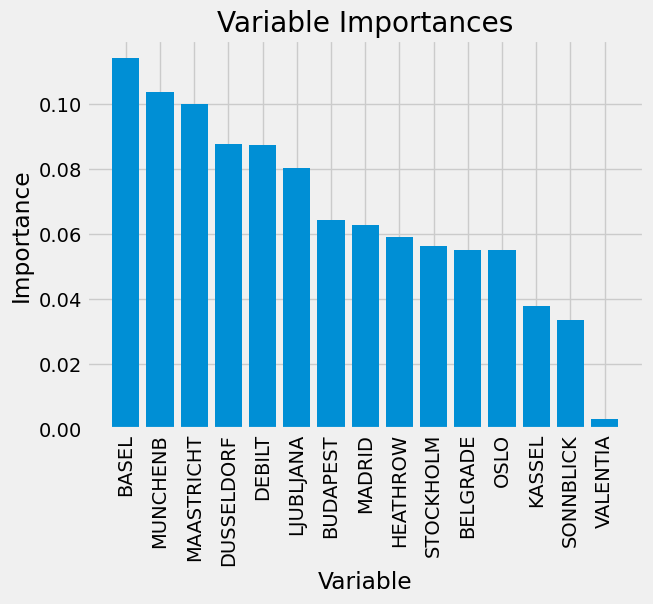

In [39]:
%matplotlib inline

plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(important)))
print(stations)

plt.bar(x_values, important, orientation = 'vertical')
plt.xticks(x_values, important.index, rotation='vertical')
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

### 5. Building random forest model for each station

## MAASTRICHT

In [40]:
# Select columns that start with 'MAASTRICHT_'
MAASTRICHT_columns = [col for col in climate_cleaned.columns if col.startswith('MAASTRICHT_')]

# Create the new DataFrame with the selected columns
climate_MAASTRICHT = climate_cleaned[MAASTRICHT_columns]

In [41]:
climate_MAASTRICHT.head()

MAASTRICHT_cloud_cover  MAASTRICHT_humidity  MAASTRICHT_pressure  \
0                       7                 0.83               1.0063   
1                       8                 0.92               1.0062   
2                       7                 0.97               1.0167   
3                       7                 0.89               1.0277   
4                       7                 0.92               1.0259   

   MAASTRICHT_global_radiation  MAASTRICHT_precipitation  MAASTRICHT_sunshine  \
0                         0.22                      0.32                  1.0   
1                         0.17                      1.34                  0.4   
2                         0.12                      0.46                  0.0   
3                         0.16                      0.00                  0.3   
4                         0.12                      0.56                  0.0   

   MAASTRICHT_temp_mean  MAASTRICHT_temp_min  MAASTRICHT_temp_max  
0                   9.5                  8.5                 11.1  
1                   8.6                  7.5                  9.9  
2                   6.9                  5.5                  9.9  
3                   7.0                  3.0                 10.0  
4                   8.1                  2.5                 11.1

In [42]:
climate_MAASTRICHT.shape

(22950, 9)

In [43]:
pleasantweather_MAASTRICHT = pleasantweather[['MAASTRICHT_pleasant_weather']]

In [44]:
pleasantweather_MAASTRICHT.head()

MAASTRICHT_pleasant_weather
0                            0
1                            0
2                            0
3                            0
4                            0

In [45]:
pleasantweather_MAASTRICHT.shape

(22950, 1)

In [46]:
X = climate_MAASTRICHT
y = pleasantweather_MAASTRICHT

In [47]:
print(X.shape)
print(y.shape)

(22950, 9)
(22950, 1)


In [48]:
#Split data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [49]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(18360, 9) (18360, 1)
(4590, 9) (4590, 1)


In [50]:
# creating a RF classifier
clf = RandomForestClassifier(n_estimators = 100) #, max_depth=20)  
  
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(X_train, y_train)

/Users/mariazaremba/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier()

In [51]:
# performing predictions on the test dataset
y_pred = clf.predict(X_test)
  
# using metrics module for accuracy calculation
print("Model Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Model Accuracy:  1.0


[Text(0.36666666666666664, 0.9375, 'x[8] <= 17.95\ngini = 0.333\nsamples = 11659\nvalue = [14483, 3877]\nclass = BAD WEATHER'),
 Text(0.3, 0.8125, 'gini = 0.0\nsamples = 7697\nvalue = [12105, 0]\nclass = BAD WEATHER'),
 Text(0.43333333333333335, 0.8125, 'x[4] <= 0.005\ngini = 0.471\nsamples = 3962\nvalue = [2378, 3877]\nclass = GOOD WEATHER'),
 Text(0.36666666666666664, 0.6875, 'x[0] <= 7.5\ngini = 0.054\nsamples = 2532\nvalue = [111, 3877]\nclass = GOOD WEATHER'),
 Text(0.13333333333333333, 0.5625, 'x[5] <= 0.95\ngini = 0.032\nsamples = 2468\nvalue = [64, 3818]\nclass = GOOD WEATHER'),
 Text(0.06666666666666667, 0.4375, 'gini = 0.0\nsamples = 40\nvalue = [64, 0]\nclass = BAD WEATHER'),
 Text(0.2, 0.4375, 'gini = 0.0\nsamples = 2428\nvalue = [0, 3818]\nclass = GOOD WEATHER'),
 Text(0.6, 0.5625, 'x[1] <= 0.755\ngini = 0.494\nsamples = 64\nvalue = [47, 59]\nclass = GOOD WEATHER'),
 Text(0.3333333333333333, 0.4375, 'x[3] <= 0.75\ngini = 0.18\nsamples = 27\nvalue = [4, 36]\nclass = GOOD WE

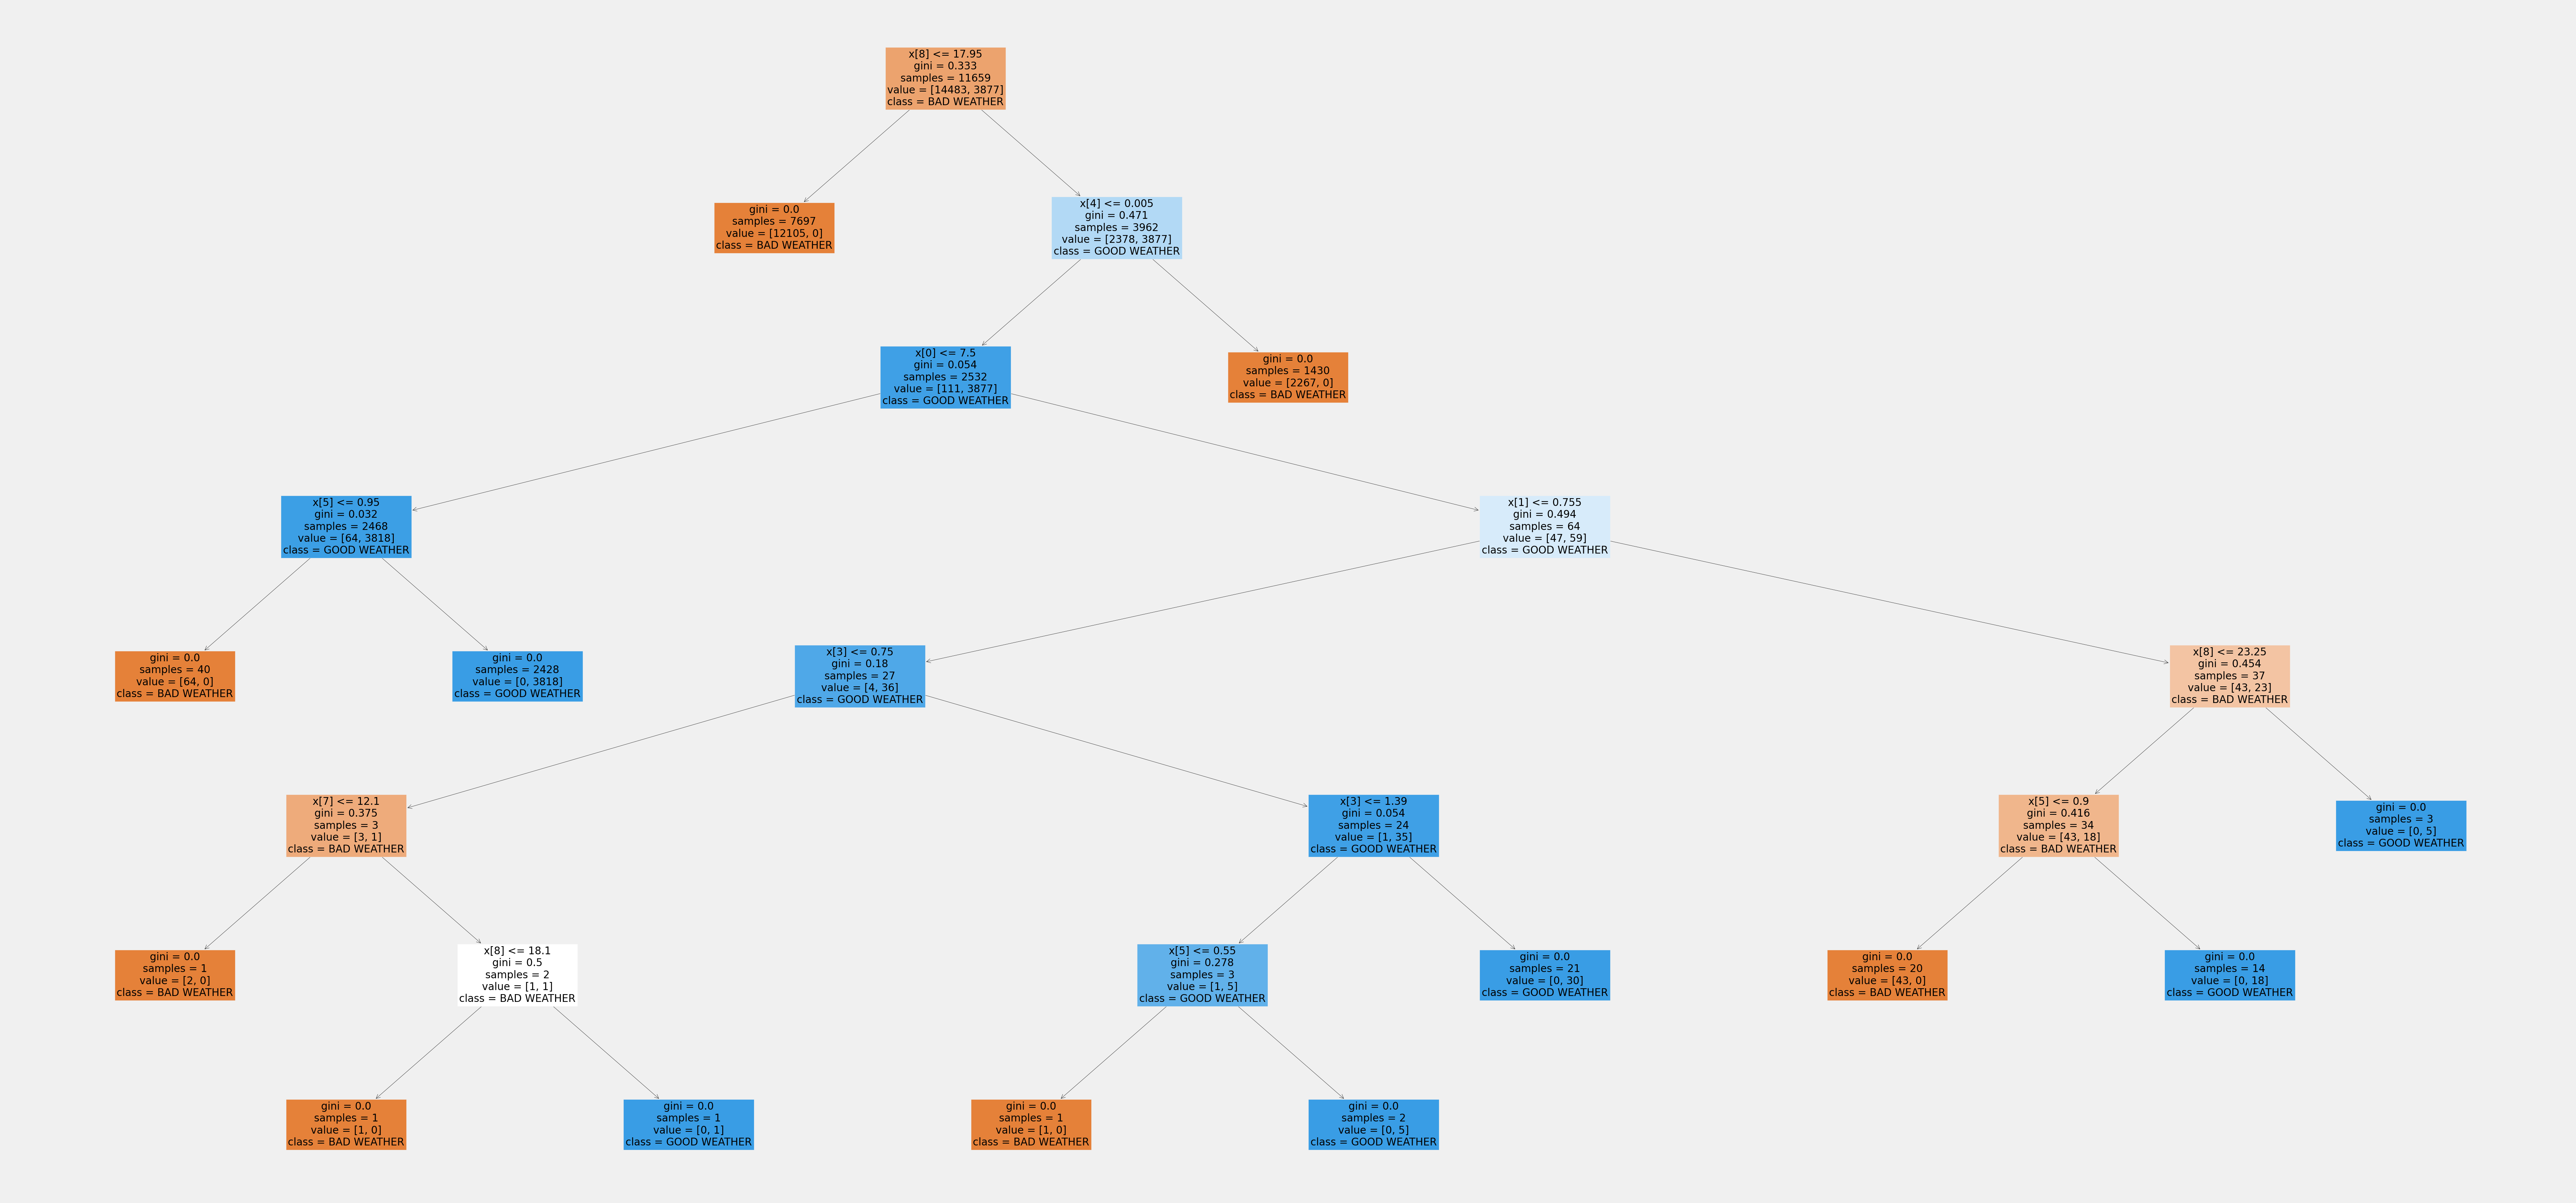

In [52]:
fig = plt.figure(figsize=(80,40))
plot_tree(clf.estimators_[15], fontsize = 20, class_names=prediction, filled=True)

In [53]:
fig.savefig(f"{path}/decision_tree.png")

In [54]:
np.set_printoptions(threshold=np.inf)
newarray = clf.feature_importances_
#print(clf.feature_importances_.shape)
newarray

array([0.03437692, 0.01725236, 0.01256731, 0.10698474, 0.3184258 ,
       0.07853487, 0.1197826 , 0.02071777, 0.29135761])

In [55]:
np.set_printoptions(threshold=1000)

In [56]:
variables = [
    'Cloud cover',
    'Humidity',
    'Pressure',
    'Global ratiation',
    'Precipitation',
    'Sunshine',
    'Temp mean',
    'Temp min',
    'Temp max'
]

In [57]:
important = pd.Series(newarray, index = variables).sort_values(ascending = False)
important

Precipitation       0.318426
Temp max            0.291358
Temp mean           0.119783
Global ratiation    0.106985
Sunshine            0.078535
Cloud cover         0.034377
Temp min            0.020718
Humidity            0.017252
Pressure            0.012567
dtype: float64

['Cloud cover', 'Humidity', 'Pressure', 'Global ratiation', 'Precipitation', 'Sunshine', 'Temp mean', 'Temp min', 'Temp max']


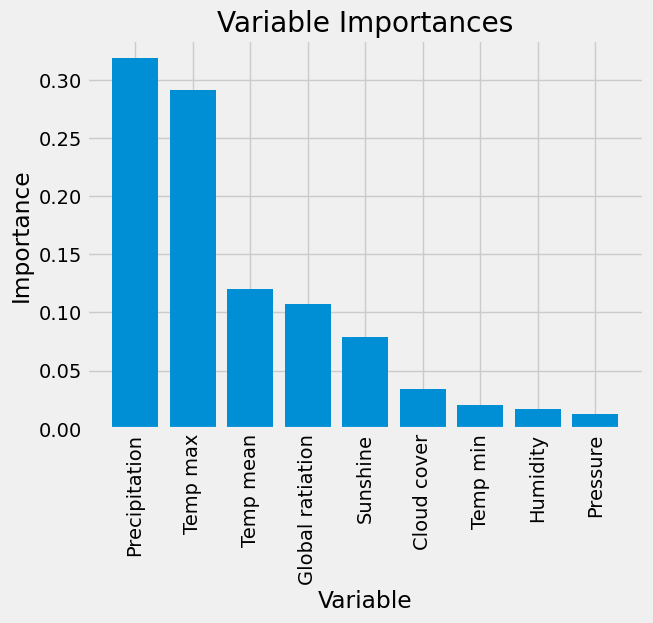

In [58]:
%matplotlib inline

plt.style.use('fivethirtyeight')

# list of x locations for plotting
x_values = list(range(len(important)))
print(variables)

plt.bar(x_values, important, orientation = 'vertical')
plt.xticks(x_values, important.index, rotation='vertical')
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

## BASEL

In [59]:
# Select columns that start with 'BASEL_'
BASEL_columns = [col for col in climate_cleaned.columns if col.startswith('BASEL_')]

# Create the new DataFrame with the selected columns
climate_BASEL = climate_cleaned[BASEL_columns]

In [60]:
pleasantweather_BASEL = pleasantweather[['BASEL_pleasant_weather']]

In [61]:
X = climate_BASEL
y = pleasantweather_BASEL

In [62]:
print(X.shape)
print(y.shape)

(22950, 9)
(22950, 1)


In [63]:
#Split data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [64]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(18360, 9) (18360, 1)
(4590, 9) (4590, 1)


In [65]:
# creating a RF classifier
clf = RandomForestClassifier(n_estimators = 100) #, max_depth=20)  
  
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(X_train, y_train)

/Users/mariazaremba/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier()

In [66]:
# performing predictions on the test dataset
y_pred = clf.predict(X_test)
  
# using metrics module for accuracy calculation
print("Model Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Model Accuracy:  1.0


[Text(0.671875, 0.9615384615384616, 'x[8] <= 17.95\ngini = 0.375\nsamples = 11636\nvalue = [13772, 4588]\nclass = BAD WEATHER'),
 Text(0.6361607142857143, 0.8846153846153846, 'gini = 0.0\nsamples = 6884\nvalue = [10830, 0]\nclass = BAD WEATHER'),
 Text(0.7075892857142857, 0.8846153846153846, 'x[5] <= 5.45\ngini = 0.476\nsamples = 4752\nvalue = [2942, 4588]\nclass = GOOD WEATHER'),
 Text(0.5580357142857143, 0.8076923076923077, 'x[1] <= 0.765\ngini = 0.396\nsamples = 1633\nvalue = [1879, 703]\nclass = BAD WEATHER'),
 Text(0.36607142857142855, 0.7307692307692307, 'x[4] <= 0.005\ngini = 0.48\nsamples = 676\nvalue = [650, 432]\nclass = BAD WEATHER'),
 Text(0.33035714285714285, 0.6538461538461539, 'x[0] <= 7.5\ngini = 0.125\nsamples = 296\nvalue = [31, 432]\nclass = GOOD WEATHER'),
 Text(0.23214285714285715, 0.5769230769230769, 'x[7] <= 13.45\ngini = 0.089\nsamples = 274\nvalue = [20, 407]\nclass = GOOD WEATHER'),
 Text(0.14285714285714285, 0.5, 'x[2] <= 1.023\ngini = 0.038\nsamples = 171\nv

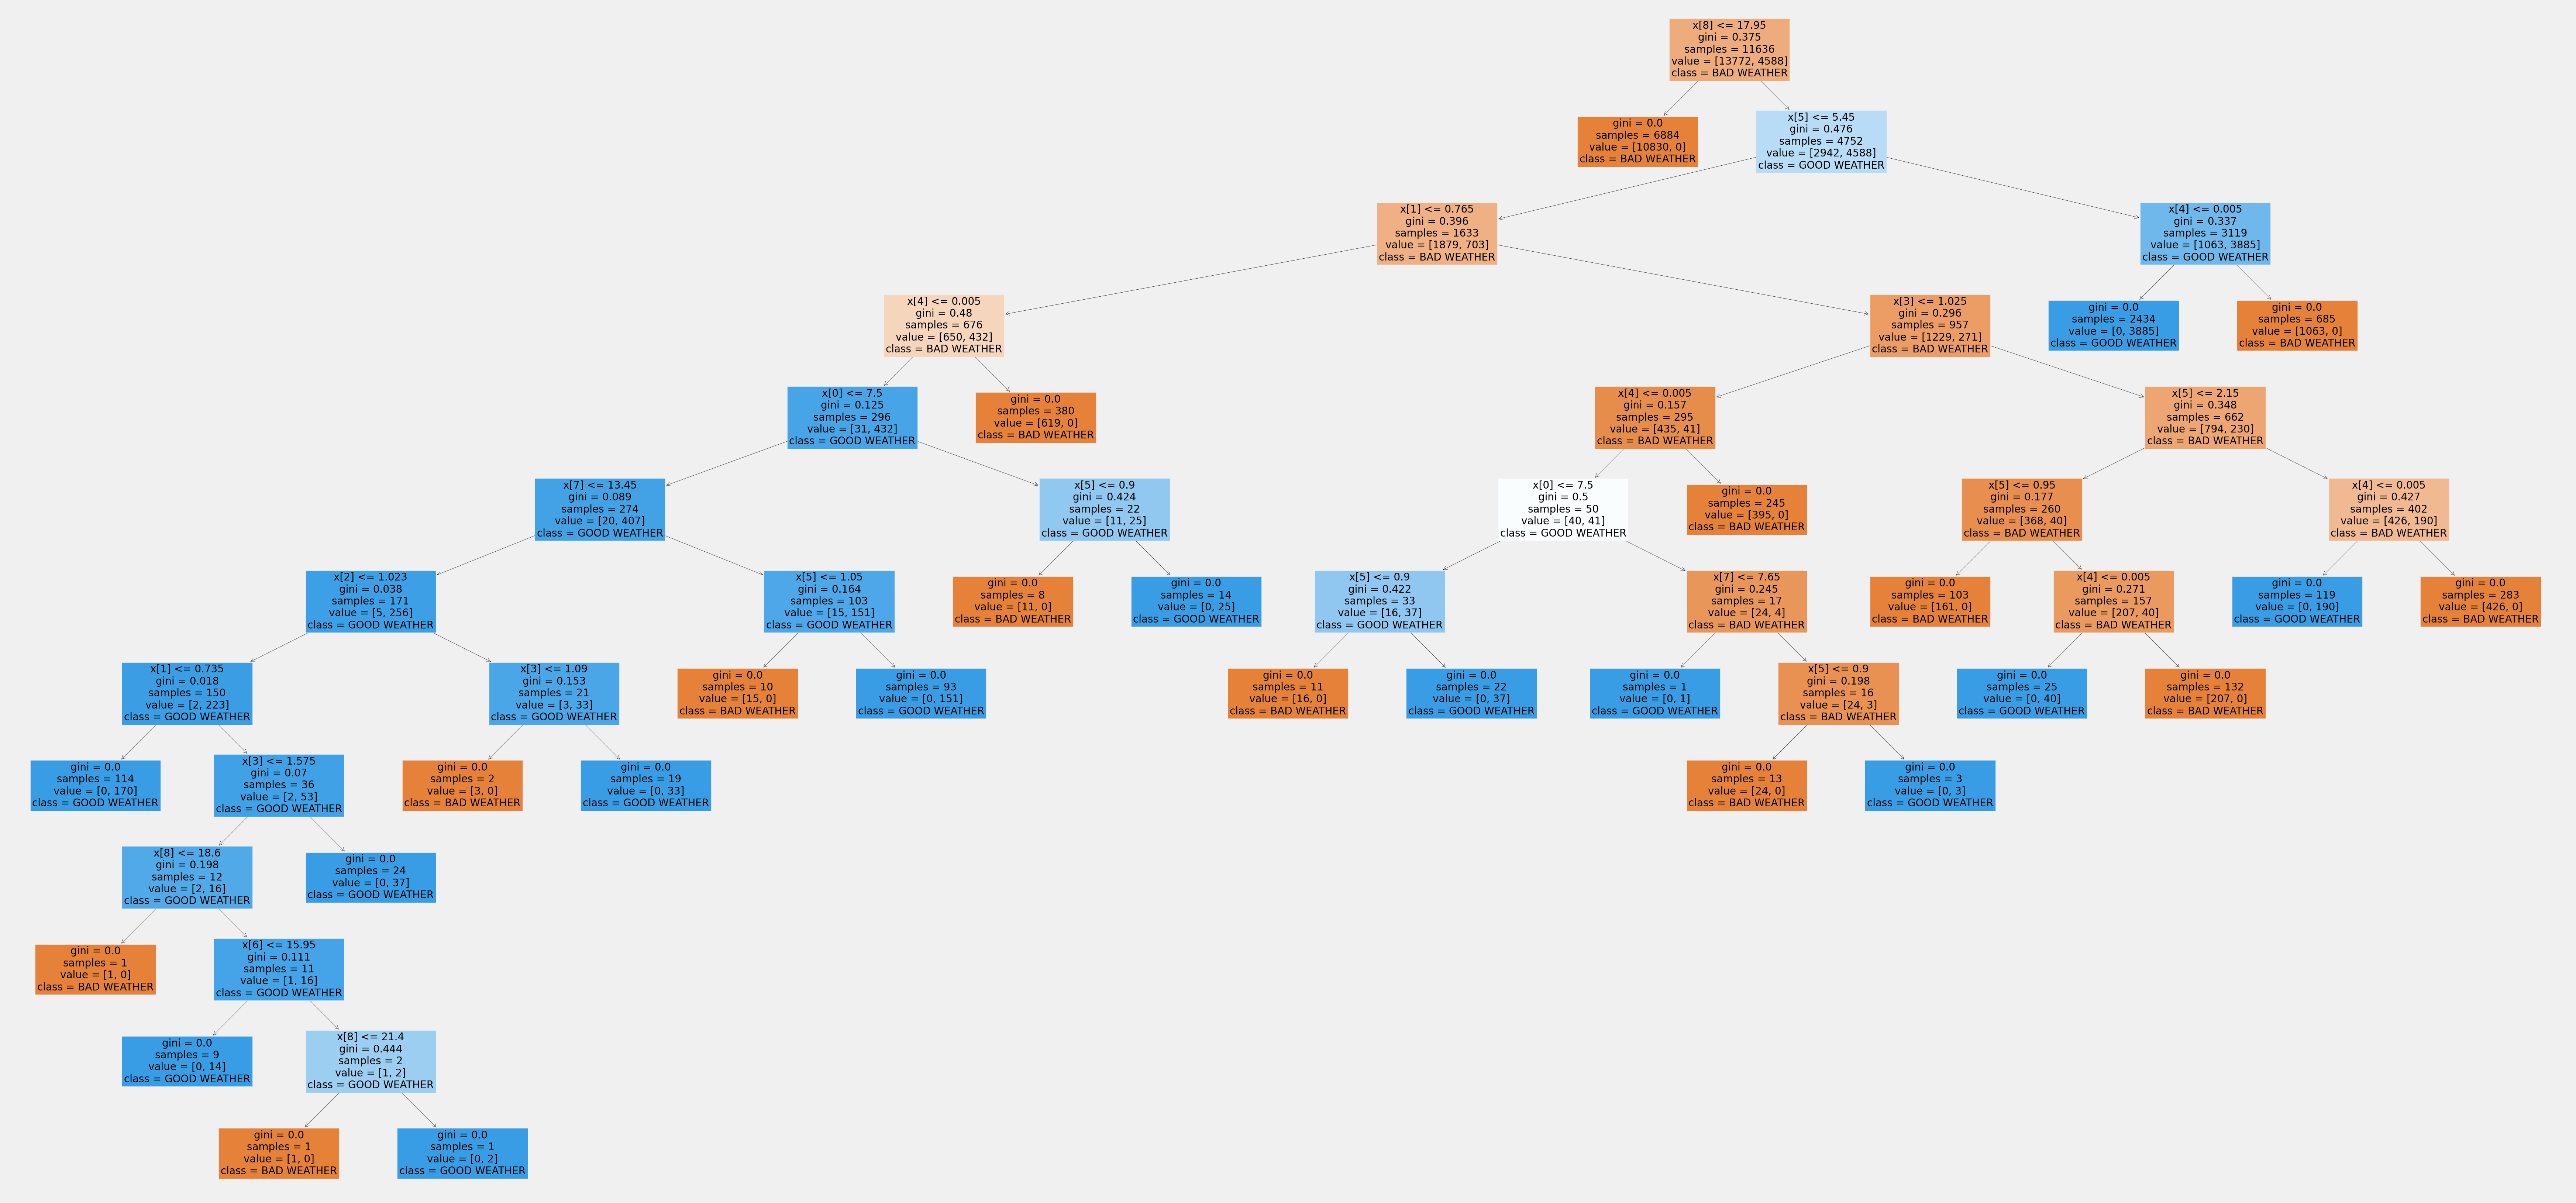

In [67]:
fig = plt.figure(figsize=(80,40))
plot_tree(clf.estimators_[15], fontsize = 20, class_names=prediction, filled=True)

In [68]:
fig.savefig(f"{path}/decision_tree2.png")

In [69]:
np.set_printoptions(threshold=np.inf)
newarray = clf.feature_importances_
#print(clf.feature_importances_.shape)
newarray

array([0.02514174, 0.01116944, 0.00705071, 0.1029074 , 0.35502778,
       0.10024557, 0.08661118, 0.02865976, 0.28318642])

In [70]:
np.set_printoptions(threshold=1000)

In [71]:
important = pd.Series(newarray, index = variables).sort_values(ascending = False)
important

Precipitation       0.355028
Temp max            0.283186
Global ratiation    0.102907
Sunshine            0.100246
Temp mean           0.086611
Temp min            0.028660
Cloud cover         0.025142
Humidity            0.011169
Pressure            0.007051
dtype: float64

['Cloud cover', 'Humidity', 'Pressure', 'Global ratiation', 'Precipitation', 'Sunshine', 'Temp mean', 'Temp min', 'Temp max']


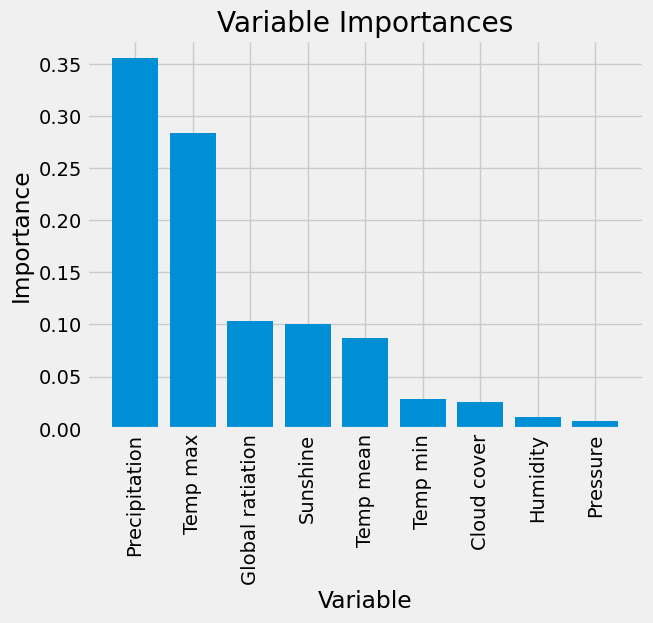

In [72]:
%matplotlib inline

plt.style.use('fivethirtyeight')

# list of x locations for plotting
x_values = list(range(len(important)))
print(variables)

plt.bar(x_values, important, orientation = 'vertical')
plt.xticks(x_values, important.index, rotation='vertical')
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

## DUSSELDORF

In [73]:
# Select columns that start with 'DUSSELDORF_'
DUSSELDORF_columns = [col for col in climate_cleaned.columns if col.startswith('DUSSELDORF_')]

# Create the new DataFrame with the selected columns
climate_DUSSELDORF = climate_cleaned[DUSSELDORF_columns]

In [74]:
pleasantweather_DUSSELDORF = pleasantweather[['DUSSELDORF_pleasant_weather']]

In [75]:
X = climate_DUSSELDORF
y = pleasantweather_DUSSELDORF

In [76]:
print(X.shape)
print(y.shape)

(22950, 9)
(22950, 1)


In [77]:
#Split data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [78]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(18360, 9) (18360, 1)
(4590, 9) (4590, 1)


In [79]:
# creating a RF classifier
clf = RandomForestClassifier(n_estimators = 100) #, max_depth=20)  
  
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(X_train, y_train)

/Users/mariazaremba/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier()

In [80]:
# performing predictions on the test dataset
y_pred = clf.predict(X_test)
  
# using metrics module for accuracy calculation
print("Model Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Model Accuracy:  1.0


[Text(0.5890302066772655, 0.9642857142857143, 'x[3] <= 1.625\ngini = 0.335\nsamples = 11616\nvalue = [14446, 3914]\nclass = BAD WEATHER'),
 Text(0.31349364069952307, 0.8928571428571429, 'x[3] <= 1.135\ngini = 0.126\nsamples = 8302\nvalue = [12295, 894]\nclass = BAD WEATHER'),
 Text(0.15798887122416533, 0.8214285714285714, 'x[8] <= 17.95\ngini = 0.046\nsamples = 6672\nvalue = [10354, 249]\nclass = BAD WEATHER'),
 Text(0.1516295707472178, 0.75, 'gini = 0.0\nsamples = 5924\nvalue = [9408, 0]\nclass = BAD WEATHER'),
 Text(0.16434817170111288, 0.75, 'x[5] <= 2.25\ngini = 0.33\nsamples = 748\nvalue = [946, 249]\nclass = BAD WEATHER'),
 Text(0.08386327503974562, 0.6785714285714286, 'x[0] <= 6.5\ngini = 0.143\nsamples = 552\nvalue = [818, 69]\nclass = BAD WEATHER'),
 Text(0.04769475357710652, 0.6071428571428571, 'x[4] <= 0.005\ngini = 0.27\nsamples = 176\nvalue = [240, 46]\nclass = BAD WEATHER'),
 Text(0.04133545310015898, 0.5357142857142857, 'x[7] <= 15.15\ngini = 0.499\nsamples = 64\nvalue =

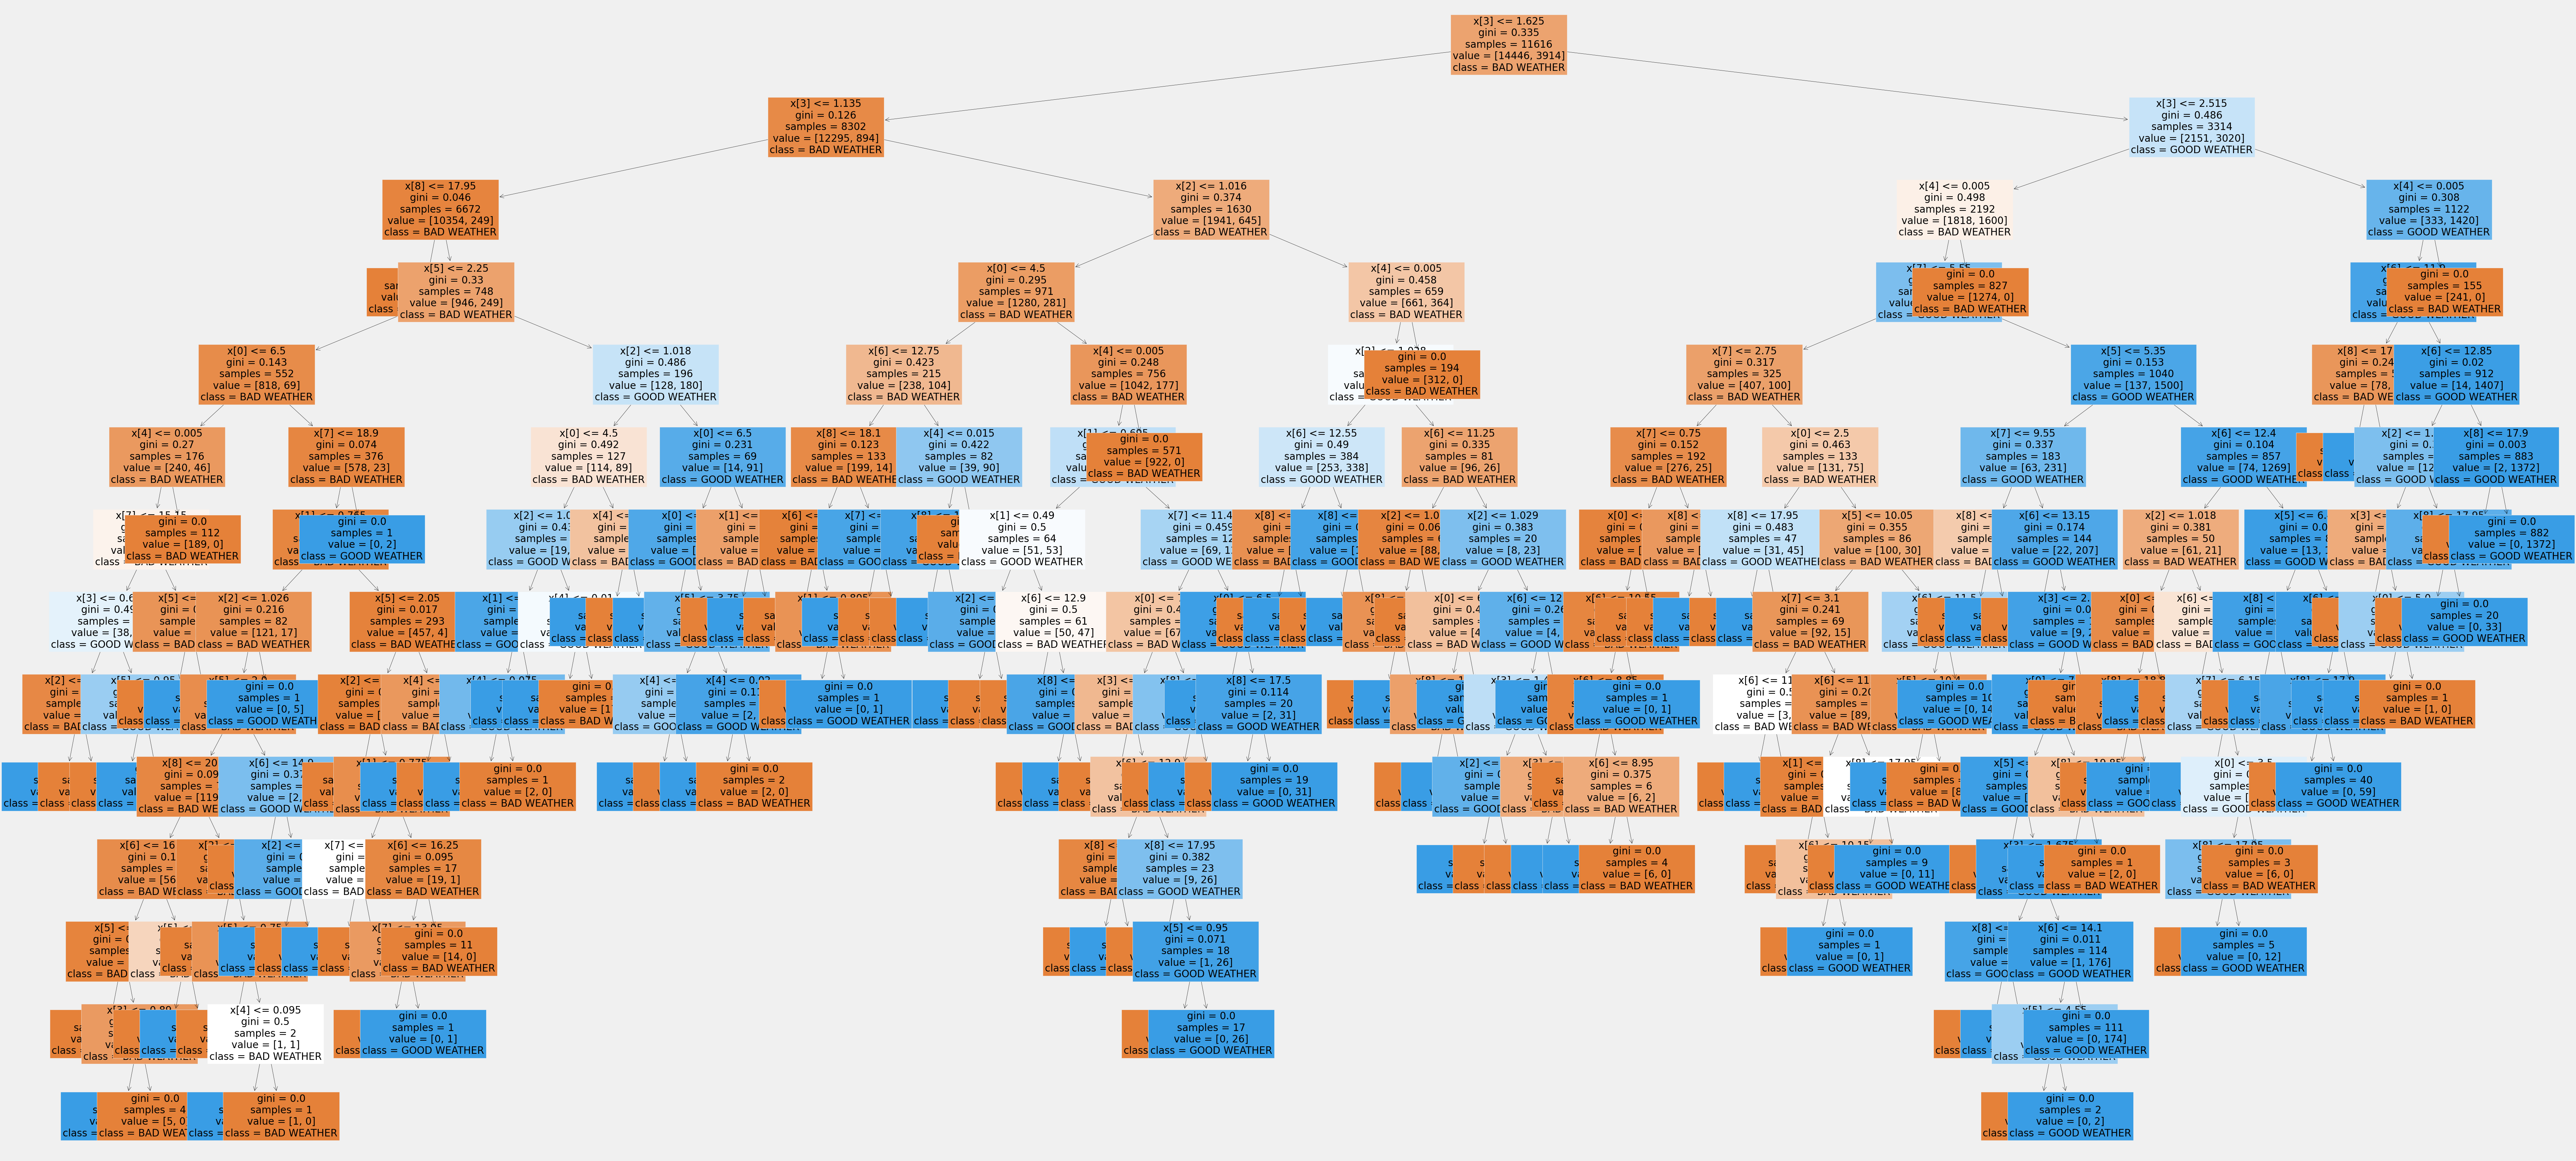

In [81]:
fig = plt.figure(figsize=(80,40))
plot_tree(clf.estimators_[15], fontsize = 20, class_names=prediction, filled=True)

In [82]:
fig.savefig(f"{path}/decision_tree3.png")

In [83]:
np.set_printoptions(threshold=np.inf)
newarray = clf.feature_importances_
#print(clf.feature_importances_.shape)
newarray

array([0.03445074, 0.0194397 , 0.01083839, 0.09850879, 0.34789727,
       0.07392956, 0.14255945, 0.0163477 , 0.25602838])

In [84]:
np.set_printoptions(threshold=1000)

In [85]:
important = pd.Series(newarray, index = variables).sort_values(ascending = False)
important

Precipitation       0.347897
Temp max            0.256028
Temp mean           0.142559
Global ratiation    0.098509
Sunshine            0.073930
Cloud cover         0.034451
Humidity            0.019440
Temp min            0.016348
Pressure            0.010838
dtype: float64

['Cloud cover', 'Humidity', 'Pressure', 'Global ratiation', 'Precipitation', 'Sunshine', 'Temp mean', 'Temp min', 'Temp max']


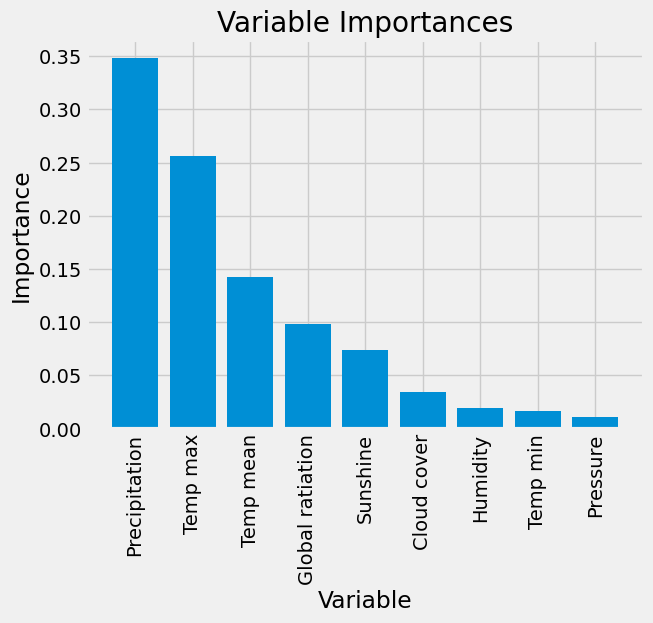

In [101]:
%matplotlib inline

plt.style.use('fivethirtyeight')

# list of x locations for plotting
x_values = list(range(len(important)))
print(variables)

plt.bar(x_values, important, orientation = 'vertical')
plt.xticks(x_values, important.index, rotation='vertical')
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');